## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [6]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [10]:
print(df.head())
df.tail()

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    162
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124


,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [8]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [11]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [21]:
pd.options.display.float_format = '{:,.2f}'.format
df.groupby("TAG").sum().sort_values("POSTS", ascending=False)

/tmp/ipykernel_8168/1637372216.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("TAG").sum().sort_values("POSTS", ascending=False)


,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [19]:
df.groupby("TAG").count().sort_values("DATE")

,DATE,POSTS
TAG,,
go,129,129
swift,135,135
r,142,142
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [27]:
df["DATE"] = pd.to_datetime(df["DATE"])
type(df["DATE"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation



In [32]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [33]:
reshaped_df.shape

(145, 14)

In [34]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.00,85.00,511.00,164.00,14.00,NaN,222.00,162.00,28.00,161.00,124.00,NaN,73.00,NaN
2008-09-01,28.00,321.00,"1,649.00",755.00,105.00,NaN,"1,137.00",640.00,131.00,482.00,542.00,6.00,290.00,NaN
2008-10-01,15.00,303.00,"1,989.00",811.00,112.00,NaN,"1,153.00",725.00,127.00,617.00,510.00,NaN,249.00,NaN
2008-11-01,17.00,259.00,"1,730.00",735.00,141.00,NaN,958.00,579.00,97.00,504.00,452.00,1.00,160.00,NaN


In [35]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2020-03-01,317.00,"2,670.00","8,954.00","5,107.00",181.00,719.00,"13,253.00","20,483.00",215.00,"6,672.00","26,673.00","5,761.00",780.00,"3,434.00"
2020-04-01,406.00,"3,472.00","10,042.00","6,820.00",250.00,887.00,"15,377.00","24,634.00",240.00,"8,060.00","32,605.00","7,047.00",860.00,"4,015.00"
2020-05-01,386.00,"3,602.00","9,923.00","7,063.00",221.00,826.00,"14,711.00","25,196.00",228.00,"7,917.00","34,478.00","6,833.00",774.00,"4,066.00"
2020-06-01,363.00,"2,757.00","9,064.00","6,161.00",214.00,765.00,"13,015.00","23,360.00",203.00,"7,188.00","31,817.00","6,249.00",670.00,"3,733.00"
2020-07-01,298.00,"2,294.00","9,145.00","5,756.00",212.00,743.00,"12,723.00","23,802.00",182.00,"7,334.00","31,261.00","5,694.00",775.00,"3,607.00"


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [36]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [38]:
reshaped_df.fillna(0, inplace=True)

In [39]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2008-08-01,8.00,85.00,511.00,164.00,14.00,0.00,222.00,162.00,28.00,161.00,124.00,0.00,73.00,0.00
2008-09-01,28.00,321.00,"1,649.00",755.00,105.00,0.00,"1,137.00",640.00,131.00,482.00,542.00,6.00,290.00,0.00
2008-10-01,15.00,303.00,"1,989.00",811.00,112.00,0.00,"1,153.00",725.00,127.00,617.00,510.00,0.00,249.00,0.00
2008-11-01,17.00,259.00,"1,730.00",735.00,141.00,0.00,958.00,579.00,97.00,504.00,452.00,1.00,160.00,0.00


In [40]:
reshaped_df.isna().values.any()

False

In [41]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

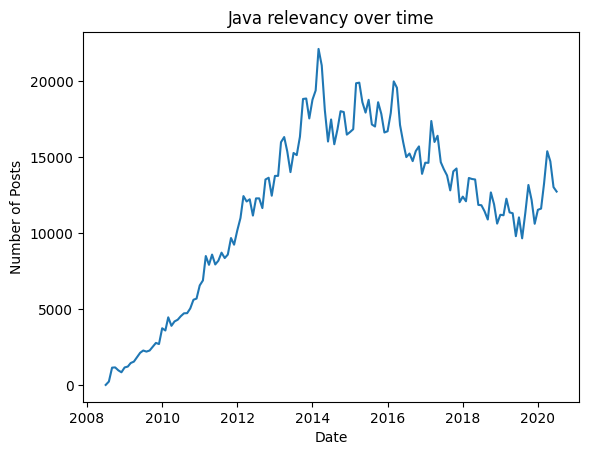

In [53]:
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.title("Java relevancy over time")
plt.plot(reshaped_df.index, reshaped_df["java"])

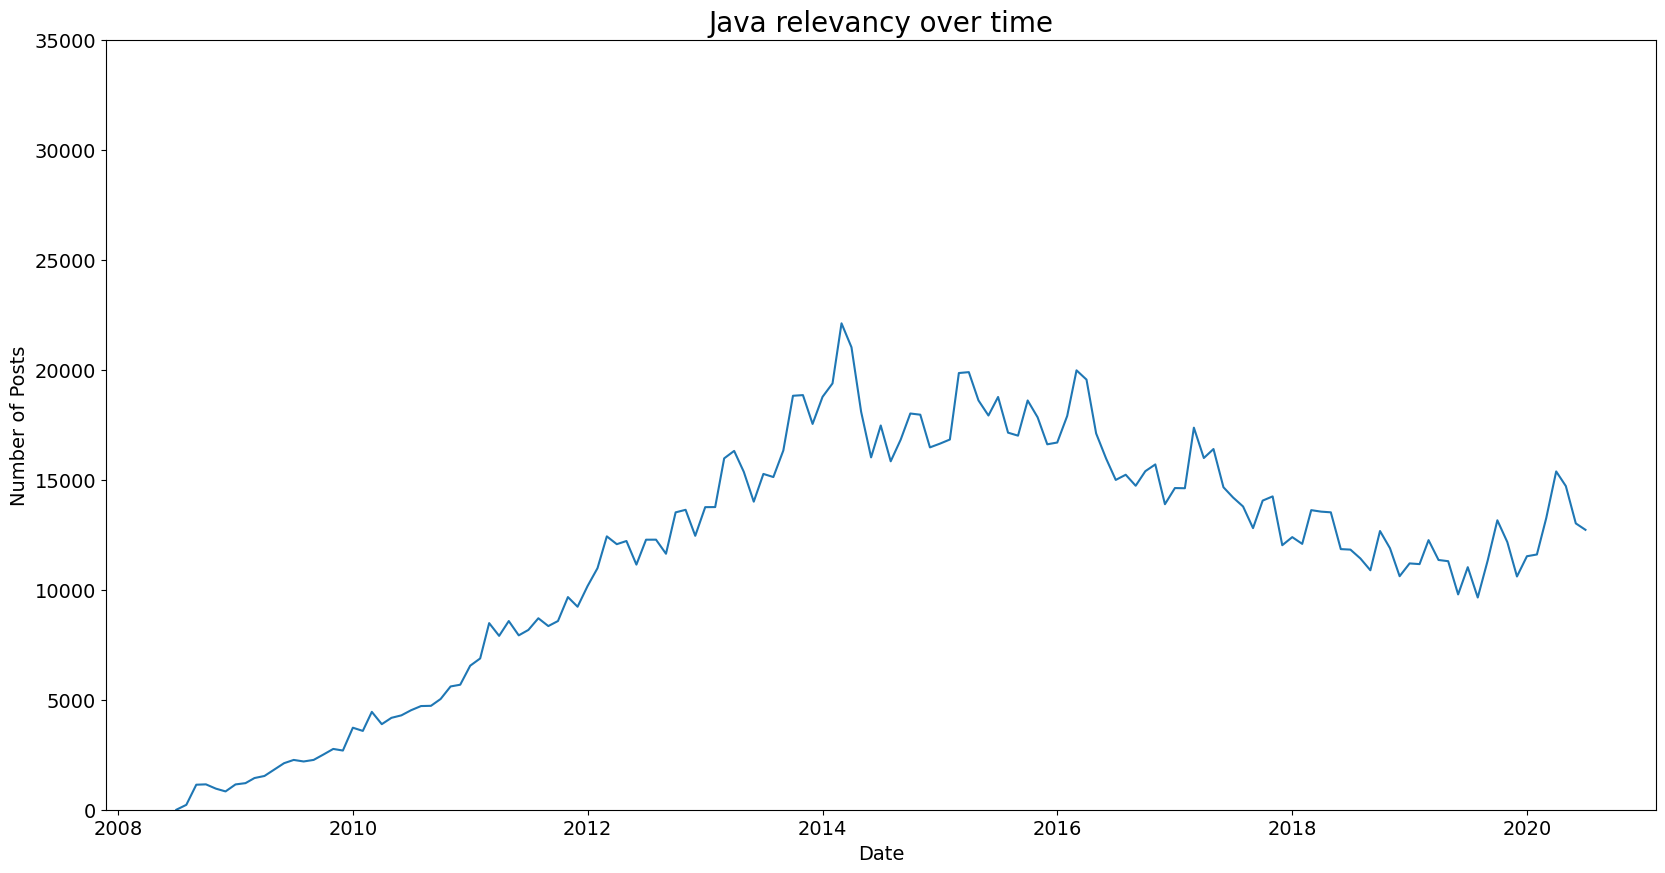

In [57]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 35000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("Java relevancy over time", fontsize=20)
plt.plot(reshaped_df.index, reshaped_df["java"])

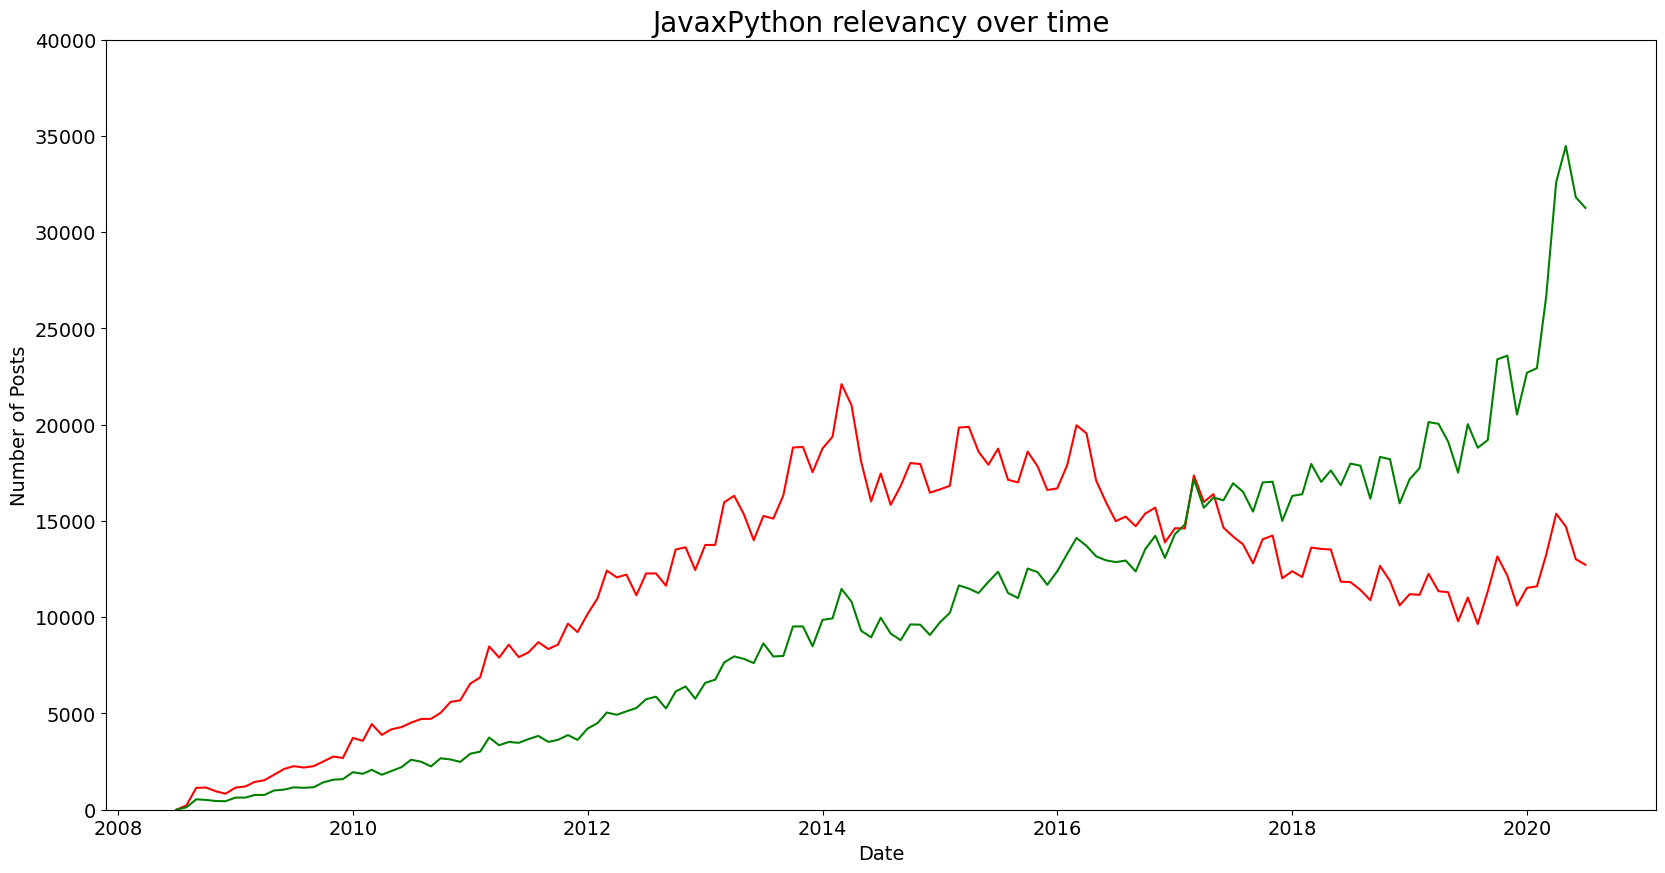

In [67]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 40000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("JavaxPython relevancy over time", fontsize=20)
plt.plot(reshaped_df.index, reshaped_df["java"], "r")
plt.plot(reshaped_df.index, reshaped_df["python"], "g")

In [64]:
print(len(reshaped_df.columns))
reshaped_df.columns

14


Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

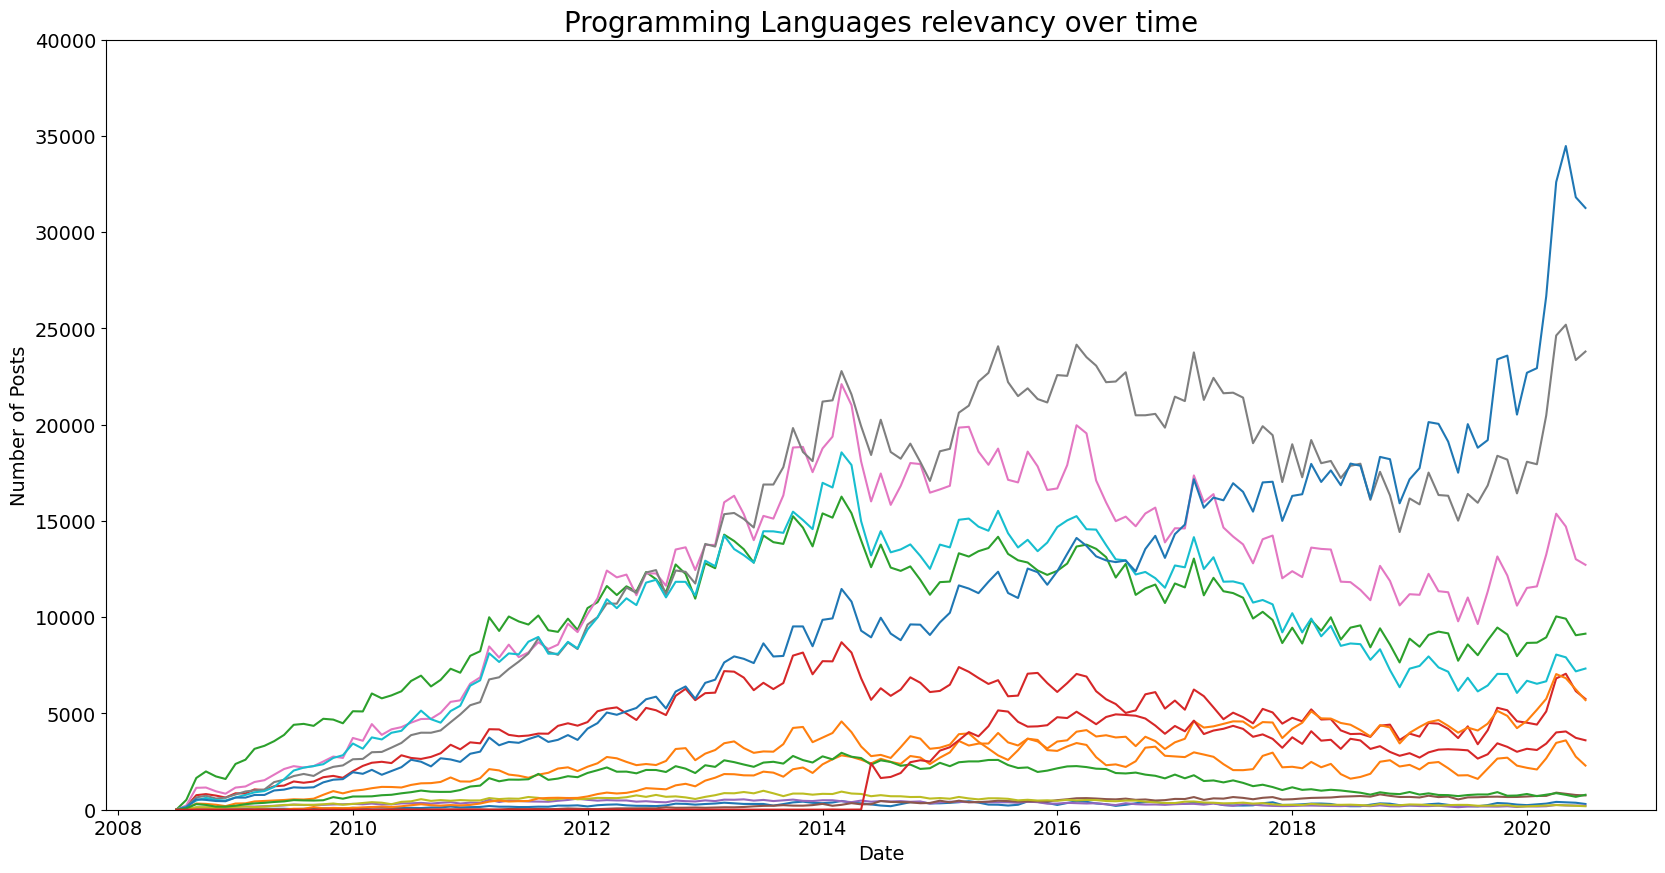

In [65]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 40000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("Programming Languages relevancy over time", fontsize=20)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

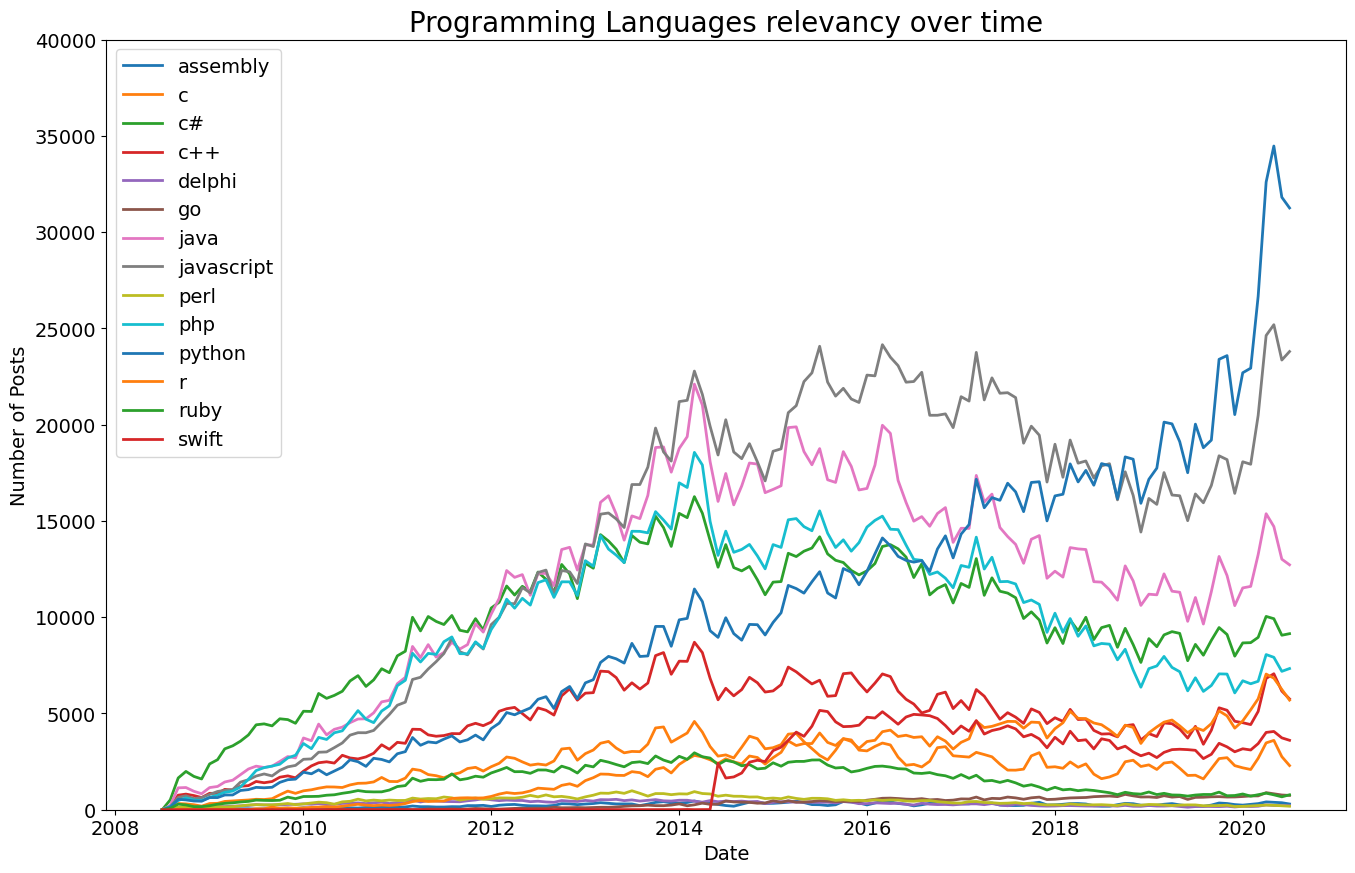

In [73]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 40000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("Programming Languages relevancy over time", fontsize=20)

for column in reshaped_df.columns:
    plt.plot(
        reshaped_df.index,
        reshaped_df[column],
        linewidth=2,
        label=reshaped_df[column].name,
    )
plt.legend(fontsize=14)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

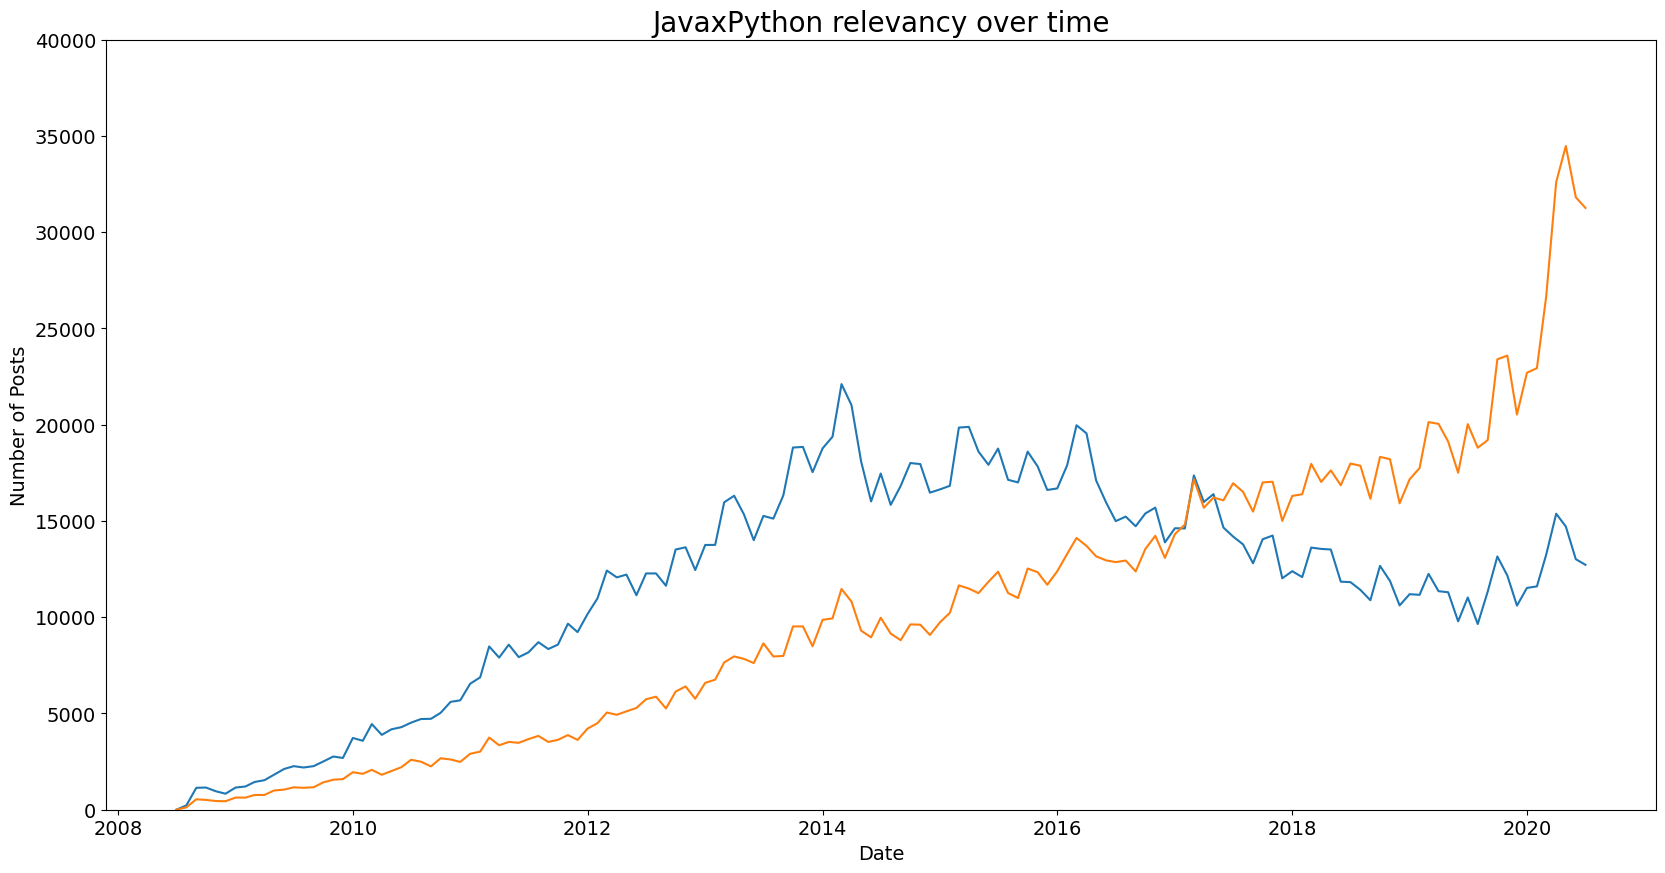

In [66]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 40000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("JavaxPython relevancy over time", fontsize=20)
plt.plot(reshaped_df.index, reshaped_df["java"])
plt.plot(reshaped_df.index, reshaped_df["python"])

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

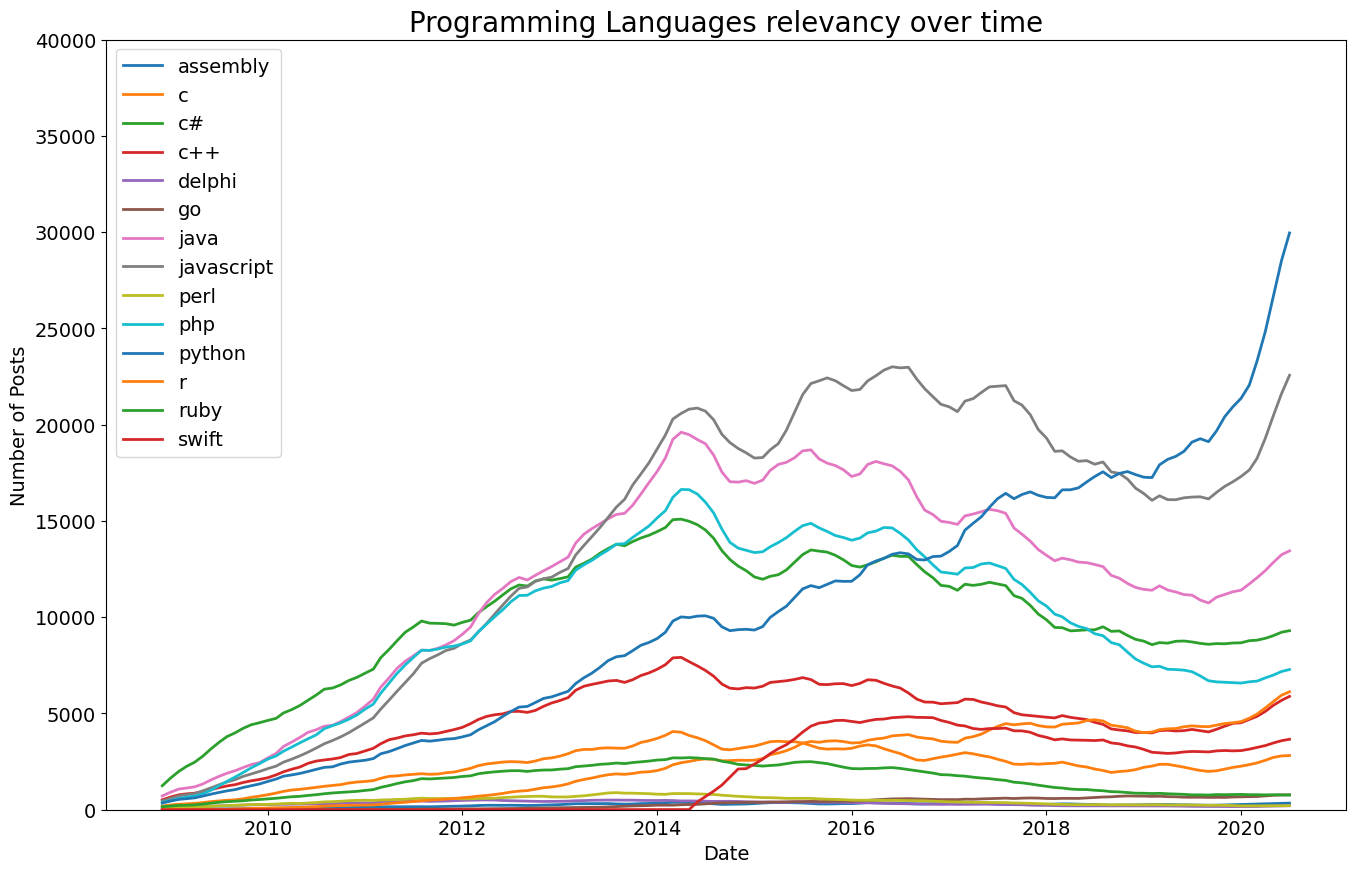

In [76]:
rolling_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 40000)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("Programming Languages relevancy over time", fontsize=20)

for column in rolling_df.columns:
    plt.plot(
        rolling_df.index,
        rolling_df[column],
        linewidth=2,
        label=rolling_df[column].name,
    )
plt.legend(fontsize=14)

In [83]:
# get the most popular tags from 2008 to 2012
tags = reshaped_df.loc["2008-01-01":"2012-12-31"].sum().sort_values(ascending=False).index
tags

Index(['c#', 'java', 'php', 'javascript', 'c++', 'python', 'c', 'ruby', 'perl',
       'r', 'delphi', 'assembly', 'go', 'swift'],
      dtype='object', name='TAG')

In [85]:
# get the most popular tags from 2013 to 2018
tags = reshaped_df.loc["2013-01-01":"2018-12-31"].sum().sort_values(ascending=False).index
tags

Index(['javascript', 'java', 'php', 'python', 'c#', 'c++', 'r', 'c', 'swift',
       'ruby', 'perl', 'go', 'delphi', 'assembly'],
      dtype='object', name='TAG')

In [87]:
# get the most popular tags on 2020
tags = reshaped_df.loc["2020-01-01":"2020-12-31"].sum().sort_values(ascending=False).index
tags

Index(['python', 'javascript', 'java', 'c#', 'php', 'r', 'c++', 'swift', 'c',
       'ruby', 'go', 'assembly', 'perl', 'delphi'],
      dtype='object', name='TAG')